In [2]:
import torch
import matplotlib.pyplot as plt

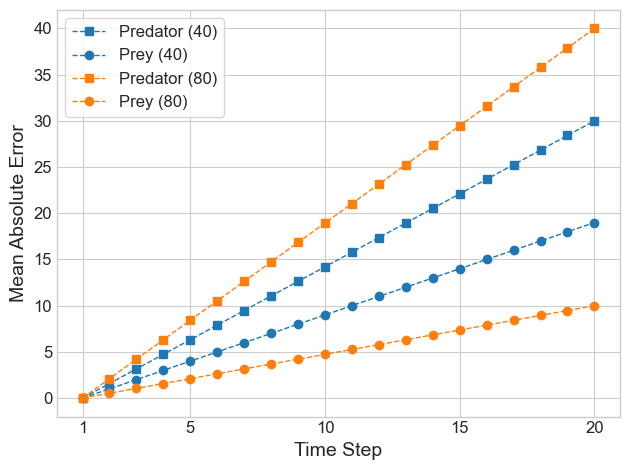

In [24]:
pred_40 = torch.linspace(0, 30, 20)
prey_40 = torch.linspace(0, 19, 20)
pred_80 = torch.linspace(0, 40, 20)
prey_80 = torch.linspace(0, 10, 20)

x = torch.linspace(1, 20, 20)

# Set global style (optional, consistent with modern publication aesthetics)
plt.style.use("seaborn-v0_8-whitegrid")


# Plot lines with customized styles
plt.plot(x, pred_40, label="Predator (40)", color="#1f77b4", marker="s", linestyle='--', linewidth=1, markersize=6)
plt.plot(x, prey_40, label="Prey (40)", color="#1f77b4", marker="o", linestyle='--', linewidth=1, markersize=6)
plt.plot(x, pred_80, label="Predator (80)", color="#ff7f0e", marker="s", linestyle='--', linewidth=1, markersize=6)
plt.plot(x, prey_80, label="Prey (80)", color="#ff7f0e", marker="o", linestyle='--', linewidth=1, markersize=6)

# Titles and labels
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Mean Absolute Error", fontsize=14)

# Tick styling
plt.xticks(ticks=[1, 5, 10, 15, 20], labels=[1, 5, 10, 15, 20], fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=12, title_fontsize=13, frameon=True)

plt.tight_layout()
plt.show()